In [55]:
import pandas as pd


df = pd.read_csv('test-case.csv')

print(df.head())


                    customer_name            dealer_name  \
0                      AMRUL QOIS        HYUNDAI MAMPANG   
1                AZIZATUL MUNIFAH      HONDA MANDALASENA   
2   BHARATH SRINIVASAN SETHURAMAN    HONDA MANDIRI BOGOR   
3                        MARSUDIN         HONDA CIKARANG   
4           NI NYOMAN PUJI ASTUTI  HONDA BINTANG TABANAN   

                                 unit_description    due_date       status  \
0  HYUNDAI, CRETA PRIME 1.5 SINGLE TONE IVT, 2022  10/27/2024  Operational   
1                 HONDA, ALL NEW BR-V E CVT, 2023  11/10/2024  Operational   
2     HONDA, ALL NEW CRV 1.5 TURBO PRESTIGE, 2022  11/15/2024  Operational   
3      HONDA, ALL NEW CITY HATCHBACK RS CVT, 2021  10/27/2024  Operational   
4                 HONDA, ALL NEW BRIO E CVT, 2024  11/25/2024  Operational   

   installment     cost_price   
0    8,085,000    404,000,000   
1    4,858,000    330,450,000   
2    9,266,000    653,400,000   
3    5,881,000    302,000,000   
4    

In [56]:
#1 Perform data cleaning on the dataset, starting to address missing values, duplication, or formatting errors.

In [57]:
#Check sekilas

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30933 entries, 0 to 30932
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_name     30933 non-null  object
 1   dealer_name       30933 non-null  object
 2   unit_description  30933 non-null  object
 3   due_date          29197 non-null  object
 4   status            30933 non-null  object
 5    installment      30933 non-null  object
 6    cost_price       30933 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


,customer_name,dealer_name,unit_description,due_date,status,installment,cost_price
count,30933,30933,30933,29197,30933,30933,30933
unique,27212,1307,4198,917,5,8556,4240
top,PT. BATAVIA PROSPERINDO TRANS TBK,HONDA CIKARANG,"HONDA, ALL NEW BRIO E CVT, 2023",10/27/2024,Operational,"4,750,000","188,000,000"
freq,110,1295,1243,9829,27622,118,279


In [58]:
#Perform data cleaning on the dataset

#Menghilangkan Spasi Belebih di nama kolom
df.columns = df.columns.str.strip()

#Hapus baris dengan missing values
print(df.isnull().sum())    #Check missing
df = df.dropna()            #Menghapus  

#Hapus Data Duplikat
df = df.drop_duplicates()   #Menghapus    

#Format Data
df['customer_name'] = df['customer_name'].str.strip()   #Menghilangkan Spasi Belebih
df['dealer_name'] = df['dealer_name'].str.strip()       #Menghilangkan Spasi Belebih
df['due_date'] = pd.to_datetime(df['due_date'])         #Mengubah ke format datetime

#Adjusment data str -> int
df['installment'] = df['installment'].str.strip()
df['installment'] = df['installment'].str.replace(',', '', regex=False)
df['installment'] = df['installment'].astype(int)
df['cost_price'] = df['cost_price'].str.strip()
df['cost_price'] = df['cost_price'].str.replace(',', '', regex=False)
df['cost_price'] = df['cost_price'].astype(int)

df['installment'] = df['installment'].astype(int)       #Mengubah ke format int
df['cost_price'] = df['cost_price'].astype(int)         #Mengubah ke format int


customer_name          0
dealer_name            0
unit_description       0
due_date            1736
status                 0
installment            0
cost_price             0
dtype: int64


In [59]:
#Check ulang
print(df.info(),"\n\n")


<class 'pandas.core.frame.DataFrame'>
Index: 28706 entries, 0 to 30932
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_name     28706 non-null  object        
 1   dealer_name       28706 non-null  object        
 2   unit_description  28706 non-null  object        
 3   due_date          28706 non-null  datetime64[ns]
 4   status            28706 non-null  object        
 5   installment       28706 non-null  int64         
 6   cost_price        28706 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.8+ MB
None 




In [60]:
print(df.isnull().sum(),"\n\n")
print(df.duplicated().sum(),"\n\n")

customer_name       0
dealer_name         0
unit_description    0
due_date            0
status              0
installment         0
cost_price          0
dtype: int64 


0 




In [61]:
#2 Perform data manipulation on the unit_description column, breaking it into 3 new columns with the column names (brand_name, type_car, year_of_car).

In [62]:
# Pecah Data menjadi 3

# Bersihkan spasi di akhir dan awal
df['unit_description'] = df['unit_description'].str.strip()


# Slice tahun dari akhir string
df['year_of_car'] = df['unit_description'].str.extract(r'(\d{4})$')

# Ubah tahun ke integer
df = df.dropna(subset=['year_of_car'])
df['year_of_car'] = df['year_of_car'].astype(int)



# Hapus tahun dari string → tersisa "brand + type" (Kolom Sementara)
df['brand_type'] = df['unit_description'].str.replace(r'\s+\d{4}$', '', regex=True)

# Pisahkan brand & type
df[['brand_name', 'type_car']] = df['brand_type'].str.split(' ', n=1, expand=True)

# Hapus koma dari hasil split
df['brand_name'] = df['brand_name'].str.replace(',', '', regex=False)
df['type_car'] = df['type_car'].str.replace(',', '', regex=False)


# Drop kolom sementara
df.drop(columns='brand_type', inplace=True)


#Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28706 entries, 0 to 30932
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_name     28706 non-null  object        
 1   dealer_name       28706 non-null  object        
 2   unit_description  28706 non-null  object        
 3   due_date          28706 non-null  datetime64[ns]
 4   status            28706 non-null  object        
 5   installment       28706 non-null  int64         
 6   cost_price        28706 non-null  int64         
 7   year_of_car       28706 non-null  int64         
 8   brand_name        28706 non-null  object        
 9   type_car          28706 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 2.4+ MB


In [63]:
#3. Count the number of cars based on type_car

In [64]:
df['type_car'].value_counts()

type_car
ALL NEW BRIO E CVT           3307
BRIO SATYA E CVT             2280
ALL NEW BRIO E MT            1964
BRIO SATYA E MT              1439
ALL NEW HR-V 1.5L SE CVT      717
                             ... 
JAZZ 1.5 IDSI CKD AT            1
Z4 M40I A/T                     1
TIGGO 5X                        1
BRIO E MT LIMITED EDITION       1
TRAX PREMIER                    1
Name: count, Length: 1490, dtype: int64

In [65]:
#3. Look for the price of the car and installments that are the most expensive to the cheapest

In [66]:
# Urutkan berdasarkan cost_price
df_sorted_price = df.sort_values(by='cost_price', ascending=False)

# Urutkan berdasarkan installment
df_sorted_installment = df.sort_values(by='installment', ascending=False)

print("Berdasarkan Cost Price:")
print("\nMobil Termahal:")
print(df_sorted_price[['brand_name', 'type_car', 'cost_price']].head(1))
print("\nMobil Termurah:")
print(df_sorted_price[['brand_name', 'type_car', 'cost_price']].tail(1))

print("\n\nBerdasarkan Installment:")
print("\nMobil Termahal:")
print(df_sorted_installment[['brand_name', 'type_car', 'installment']].head(1))
print("\nMobil Termurah:")
print(df_sorted_installment[['brand_name', 'type_car', 'installment']].tail(1))

Berdasarkan Cost Price:

Mobil Termahal:
      brand_name      type_car   cost_price
21072    FERRARI  SF 90 SPIDER  17500000000

Mobil Termurah:
      brand_name             type_car  cost_price
20911   WORKSHOP  EQUIPMENT EQUIPMENT    58410975


Berdasarkan Installment:

Mobil Termahal:
       brand_name            type_car  installment
20240  MITSUBISHI  XPANDER EXCEED CVT    782681940

Mobil Termurah:
      brand_name            type_car  installment
25430      HONDA  ALL NEW BRIO E CVT      1082000


In [67]:
#5. Then analyze the dataset with the concept of Exploratory Data Analysis (EDA)

In [68]:
# Melihat dimensi dan tipe data
print(df.shape,"\n")
print(df.info(),"\n")


(28706, 10) 

<class 'pandas.core.frame.DataFrame'>
Index: 28706 entries, 0 to 30932
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_name     28706 non-null  object        
 1   dealer_name       28706 non-null  object        
 2   unit_description  28706 non-null  object        
 3   due_date          28706 non-null  datetime64[ns]
 4   status            28706 non-null  object        
 5   installment       28706 non-null  int64         
 6   cost_price        28706 non-null  int64         
 7   year_of_car       28706 non-null  int64         
 8   brand_name        28706 non-null  object        
 9   type_car          28706 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 2.4+ MB
None 



In [69]:
#Distribusi Kategori
df['brand_name'].value_counts().head(5)



brand_name
HONDA         22569
TOYOTA         1802
WULING         1361
MITSUBISHI      922
SUZUKI          524
Name: count, dtype: int64

In [70]:
df['type_car'].value_counts().head(5)

type_car
ALL NEW BRIO E CVT          3307
BRIO SATYA E CVT            2280
ALL NEW BRIO E MT           1964
BRIO SATYA E MT             1439
ALL NEW HR-V 1.5L SE CVT     717
Name: count, dtype: int64

In [71]:
#Harga Rata-rata per Tipe Mobil
avg_price_by_type = df.groupby('type_car')['cost_price'].mean().sort_values(ascending=False)
print(avg_price_by_type)


type_car
SF 90 SPIDER                          1.750000e+10
Wide Body Mining SKT 80S              1.400000e+10
RECYCLE PROCESS                       1.112496e+10
RANGER EURO 4 FM 280 JD + KAROSERI    7.500000e+09
WA800-3A                              5.000000e+09
                                          ...     
KARIMUN ESTILO M/T                    7.550000e+07
AYLA D M/T                            7.450000e+07
LIVINA 1.5 (4X2) A/T                  7.000000e+07
AVEGA  GX 1.5 M/T                     6.650000e+07
CROSS 1.2 CVT                         6.300000e+07
Name: cost_price, Length: 1490, dtype: float64


In [72]:
#Kesimpulan Sementara
most_common_brand = df['brand_name'].value_counts().idxmax()
print("\n\nBrand paling umum: ", most_common_brand)

most_expensive_type = avg_price_by_type.idxmax()
print("\nTipe mobil termahal rata-rata: ",most_expensive_type)

print("\nBerdasarkan cek di awal ada beberapa data kosong pada due_date dan year_of_car yang perlu ditindaklanjuti")




Brand paling umum:  HONDA

Tipe mobil termahal rata-rata:  SF 90 SPIDER

Berdasarkan cek di awal ada beberapa data kosong pada due_date dan year_of_car yang perlu ditindaklanjuti


In [73]:
#6. Make a Data Visualization based on :

C:\Users\ACER\AppData\Local\Temp\ipykernel_12080\3195860772.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


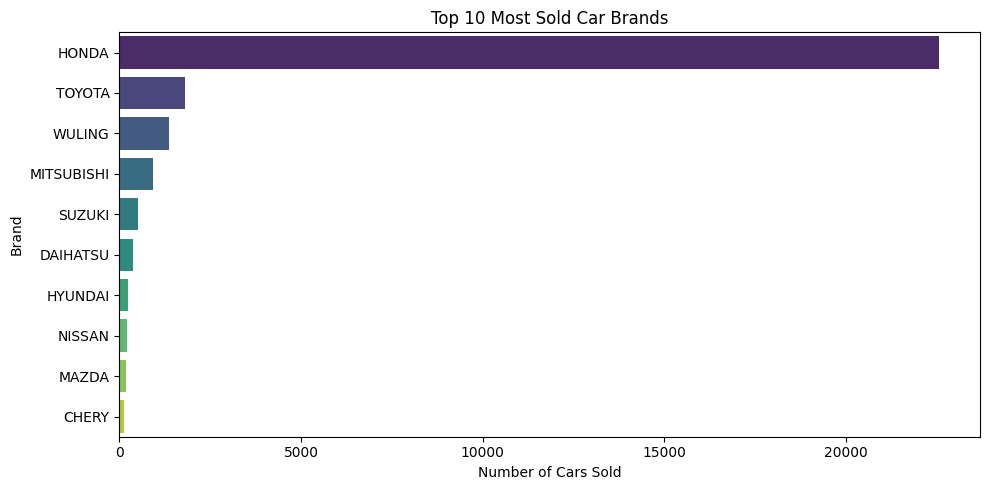

In [74]:
#a.Top 10 Most Sold Car Brands
import seaborn as sns
import matplotlib.pyplot as plt

top_brands = df['brand_name'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top 10 Most Sold Car Brands')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

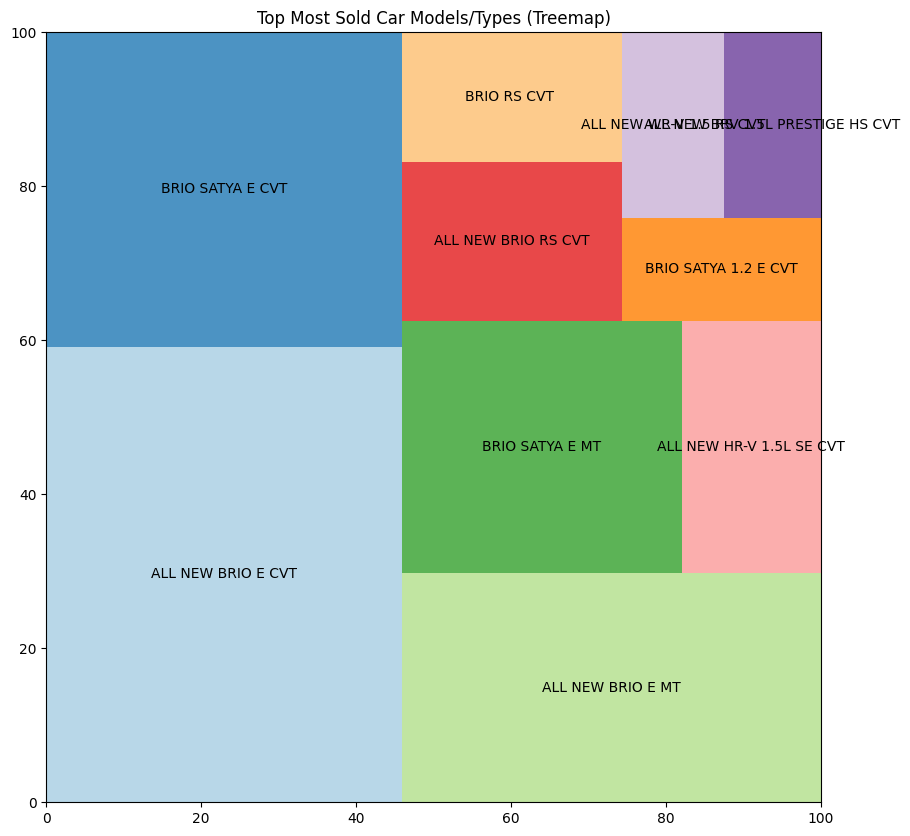

In [75]:
#b.Top Most Sold Car Models/Types using treemap
import squarify

top_types = df['type_car'].value_counts().head(10)  # Ambil 10 terbesar

plt.figure(figsize=(10,10))
squarify.plot(sizes=top_types.values, label=top_types.index, alpha=0.8, 
              color=sns.color_palette("Paired", len(top_types)))
plt.title('Top Most Sold Car Models/Types (Treemap)')
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_12080\100611280.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")


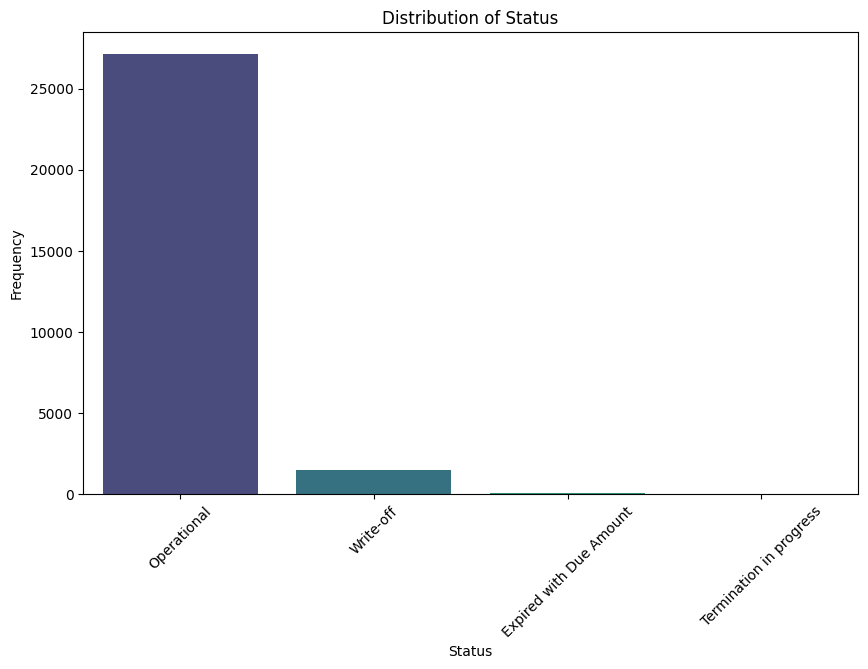

In [76]:
#c.Distribution of Status Type

status_counts = df['status'].value_counts() 

plt.figure(figsize=(10,6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")

plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12080\2947996389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette="Blues_d")


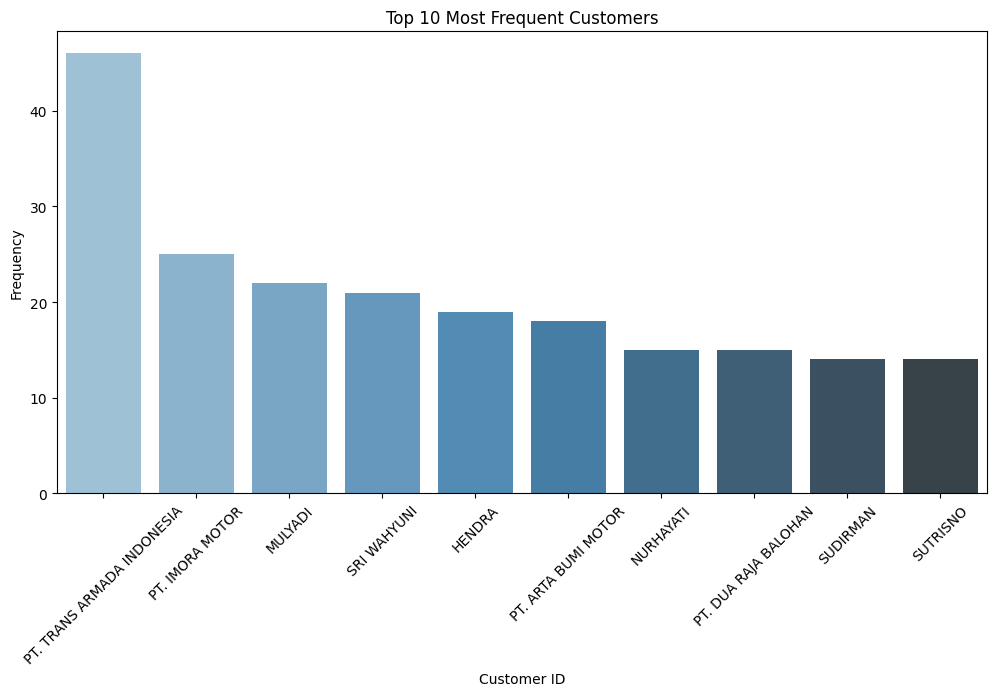

In [77]:
#d. Top 10 Most Frequent Customers

top_customers = df['customer_name'].value_counts().head(10) 

plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="Blues_d")

plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12080\3738667380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette="Blues_d")


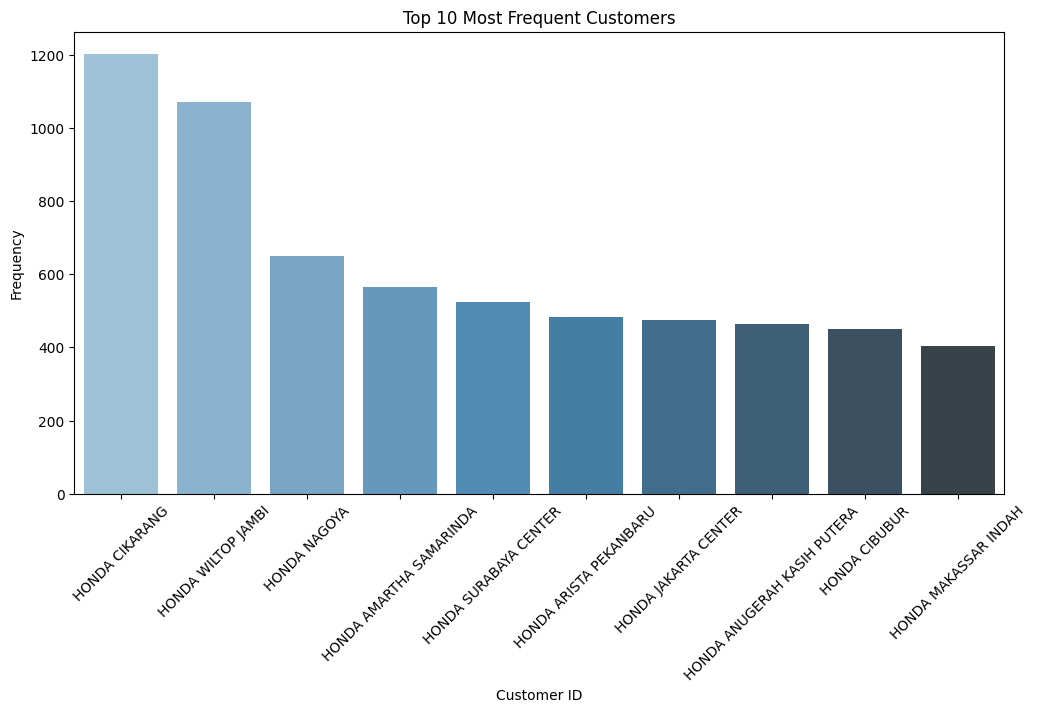

In [78]:
#e.Top 10 Most Frequent Dealers

top_customers = df['dealer_name'].value_counts().head(10) 

plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="Blues_d")

plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotasi label pada sumbu X agar mudah dibaca
plt.show()